<a href="https://colab.research.google.com/github/FranziskoB/Clusters/blob/main/R_Clusters_Exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Cluster Exemplo 2
Objetivo: categorizar os países por meio dos indicadores sociais e econômicos

##Instalando e carregando as bibliotecas

In [ ]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"plot3D" %in% installed.packages()){
    install.packages("plot3D")}
if(!"plotly" %in% installed.packages()){
    install.packages("plotly")}   
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"cluster" %in% installed.packages()){
    install.packages("cluster")} 
if(!"factoextra" %in% installed.packages()){
    install.packages("factoextra")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(plot3D)
library(plotly)
library(htmltools)
library(cluster)
library(factoextra)
library(ggrepel)

## Importando, vizualizando e tratando os dados

In [6]:
paises <- read.csv(url("https://raw.githubusercontent.com/FranziskoB/Clusters/main/dados/dados_paises.csv"), sep = ",", dec = ".")

In [7]:
head(paises, n=5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Estatísticas descritivas

In [8]:
summary(paises)

   country            child_mort        exports            health      
 Length:167         Min.   :  2.60   Min.   :  0.109   Min.   : 1.810  
 Class :character   1st Qu.:  8.25   1st Qu.: 23.800   1st Qu.: 4.920  
 Mode  :character   Median : 19.30   Median : 35.000   Median : 6.320  
                    Mean   : 38.27   Mean   : 41.109   Mean   : 6.816  
                    3rd Qu.: 62.10   3rd Qu.: 51.350   3rd Qu.: 8.600  
                    Max.   :208.00   Max.   :200.000   Max.   :17.900  
    imports             income         inflation         life_expec   
 Min.   :  0.0659   Min.   :   609   Min.   : -4.210   Min.   :32.10  
 1st Qu.: 30.2000   1st Qu.:  3355   1st Qu.:  1.810   1st Qu.:65.30  
 Median : 43.3000   Median :  9960   Median :  5.390   Median :73.10  
 Mean   : 46.8902   Mean   : 17145   Mean   :  7.782   Mean   :70.56  
 3rd Qu.: 58.7500   3rd Qu.: 22800   3rd Qu.: 10.750   3rd Qu.:76.80  
 Max.   :174.0000   Max.   :125000   Max.   :104.000   Max.   :82.80  

As variáveis apresentam unidades de medida e amplitudes muito distintas
Padronizando as variáveis

In [9]:
pais_padronizado <- as.data.frame(scale(paises[,2:10]))
rownames(pais_padronizado) <- paises$country

Todas as variáveis passam a ter média = 0 e desvio padrão = 1. Por exemplo:

In [10]:
round(mean(pais_padronizado$exports),3)
round(sd(pais_padronizado$exports))
round(mean(pais_padronizado$gdpp),3)
round(sd(pais_padronizado$gdpp))

[1] 0

[1] 1

[1] 0

[1] 1

Vamos iniciar com o esquema de aglomeração hierárquico
Matriz de dissimilaridades

In [11]:
matriz_D <- pais_padronizado %>%
  dist(method = "euclidean")

Elaboração da clusterização hierárquica utilizando 3 métodos

In [12]:
cluster_hier_single <- agnes(x = matriz_D, method = "single") #single linkage

cluster_hier_complete <- agnes(x = matriz_D, method = "complete") #Complete linkage

cluster_hier_average <- agnes(x = matriz_D, method = "average")#Average linkage

Construção dos dendrogramas de cada método

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


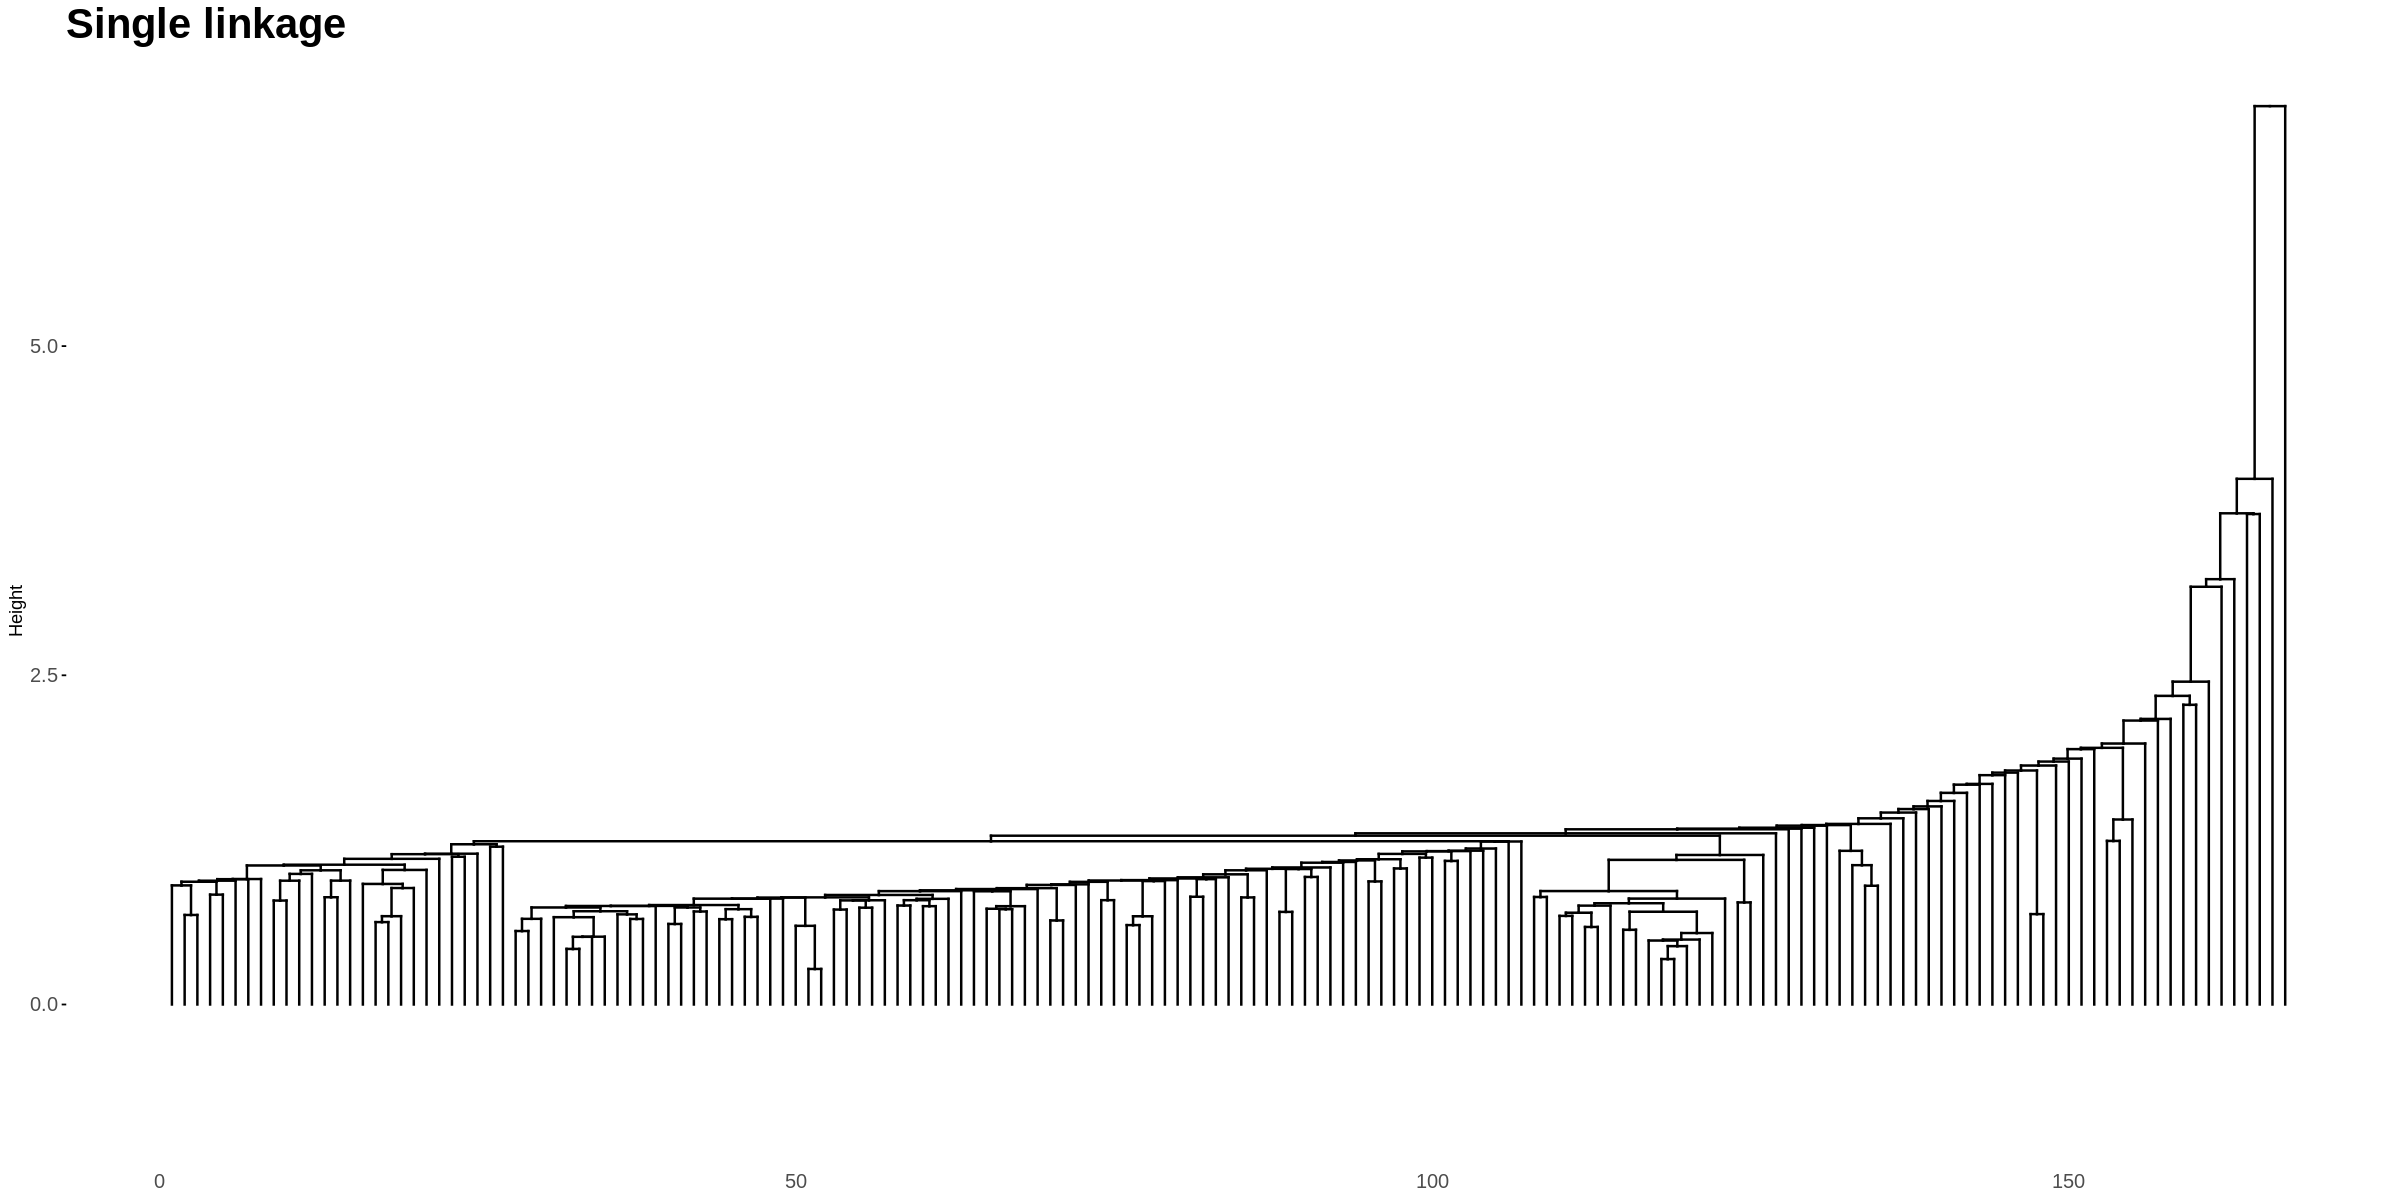

In [51]:
fviz_dend(x = cluster_hier_single, show_labels = F,main = "") +
ggtitle("Single linkage") +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


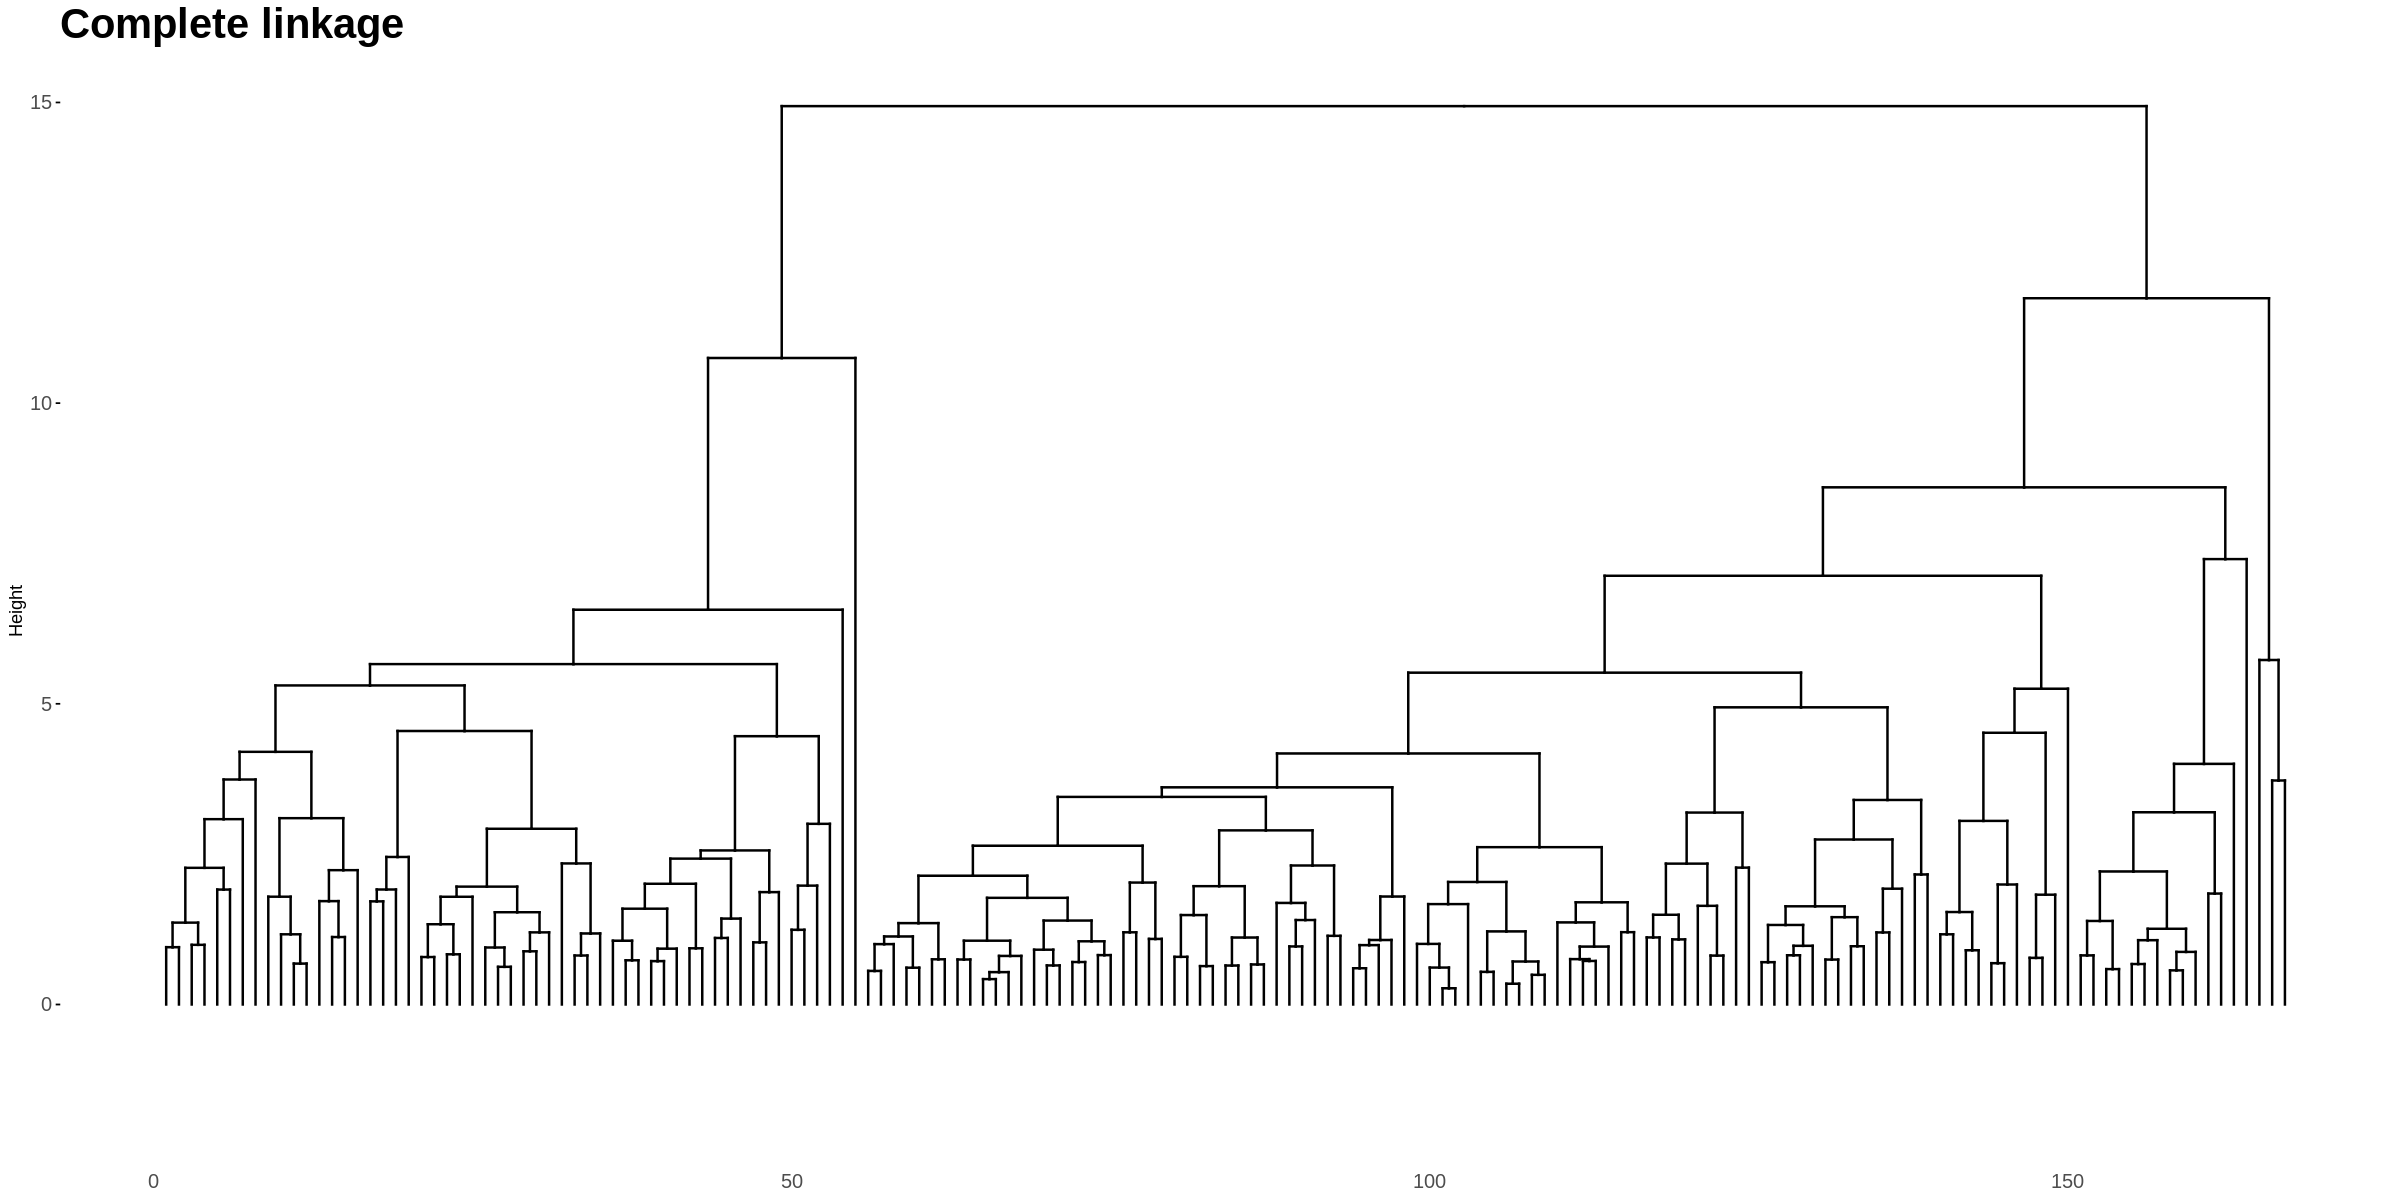

In [52]:
fviz_dend(x = cluster_hier_complete, show_labels = F,main = "") +
ggtitle("Complete linkage") +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


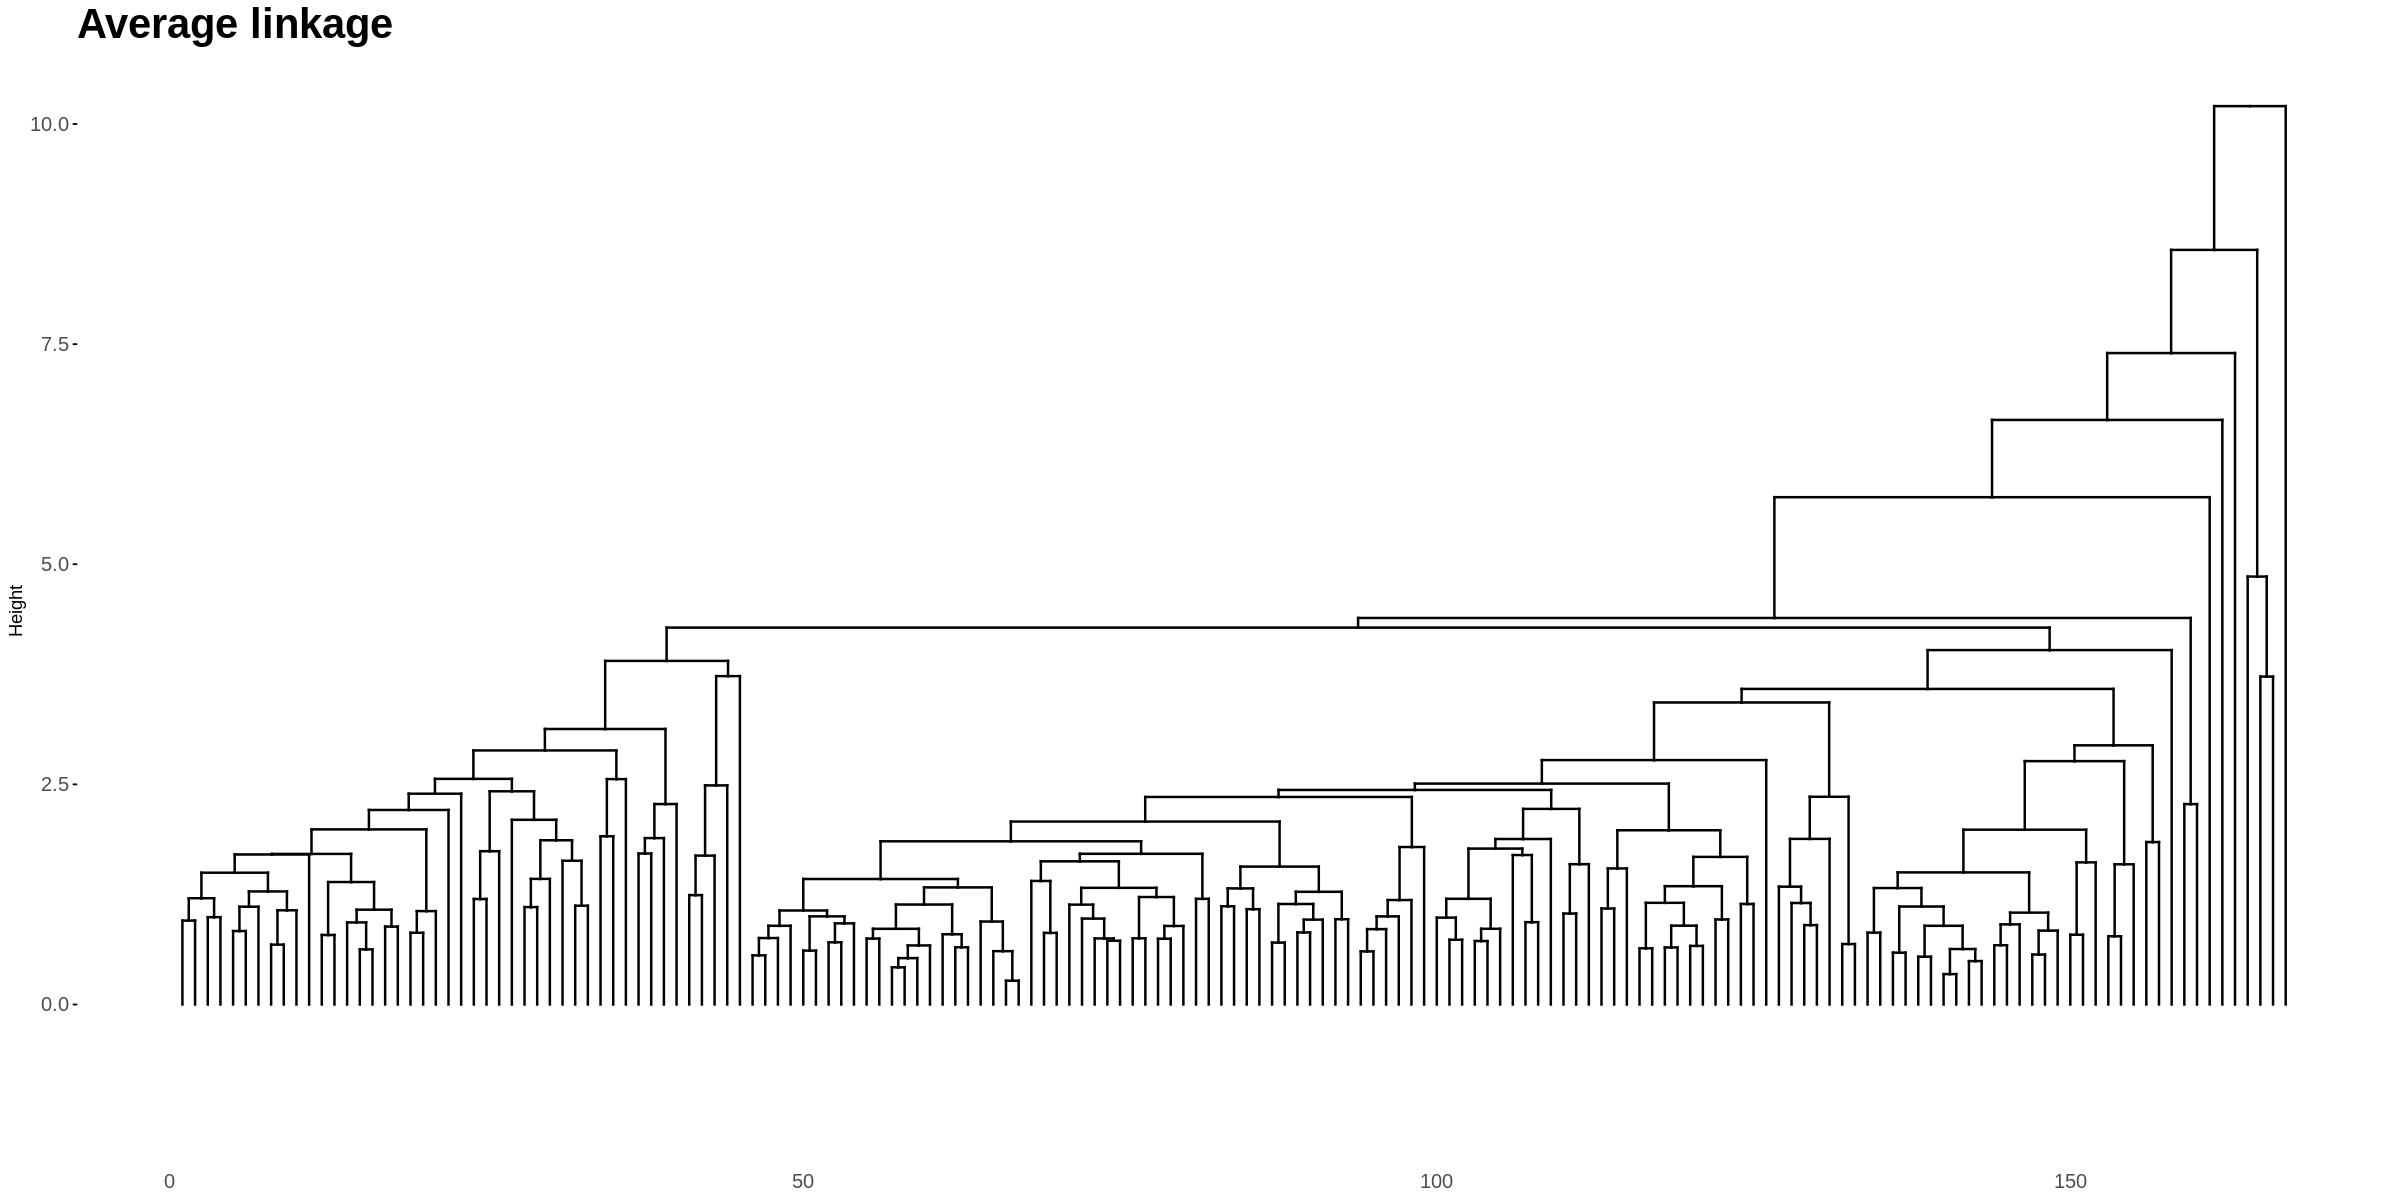

In [50]:
fviz_dend(x = cluster_hier_average, show_labels = F,main = "") +
ggtitle("Average linkage") +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

*  O método de encadeamento single linkage não permite uma clusterização útil.Pode-se interpretar que as observações estão muito próximas umas das outras

*  O método de encadeamento complete linkage melhora significativamente
*  Vamos optar pelo complete linkage (average cria clusters com menos observações)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


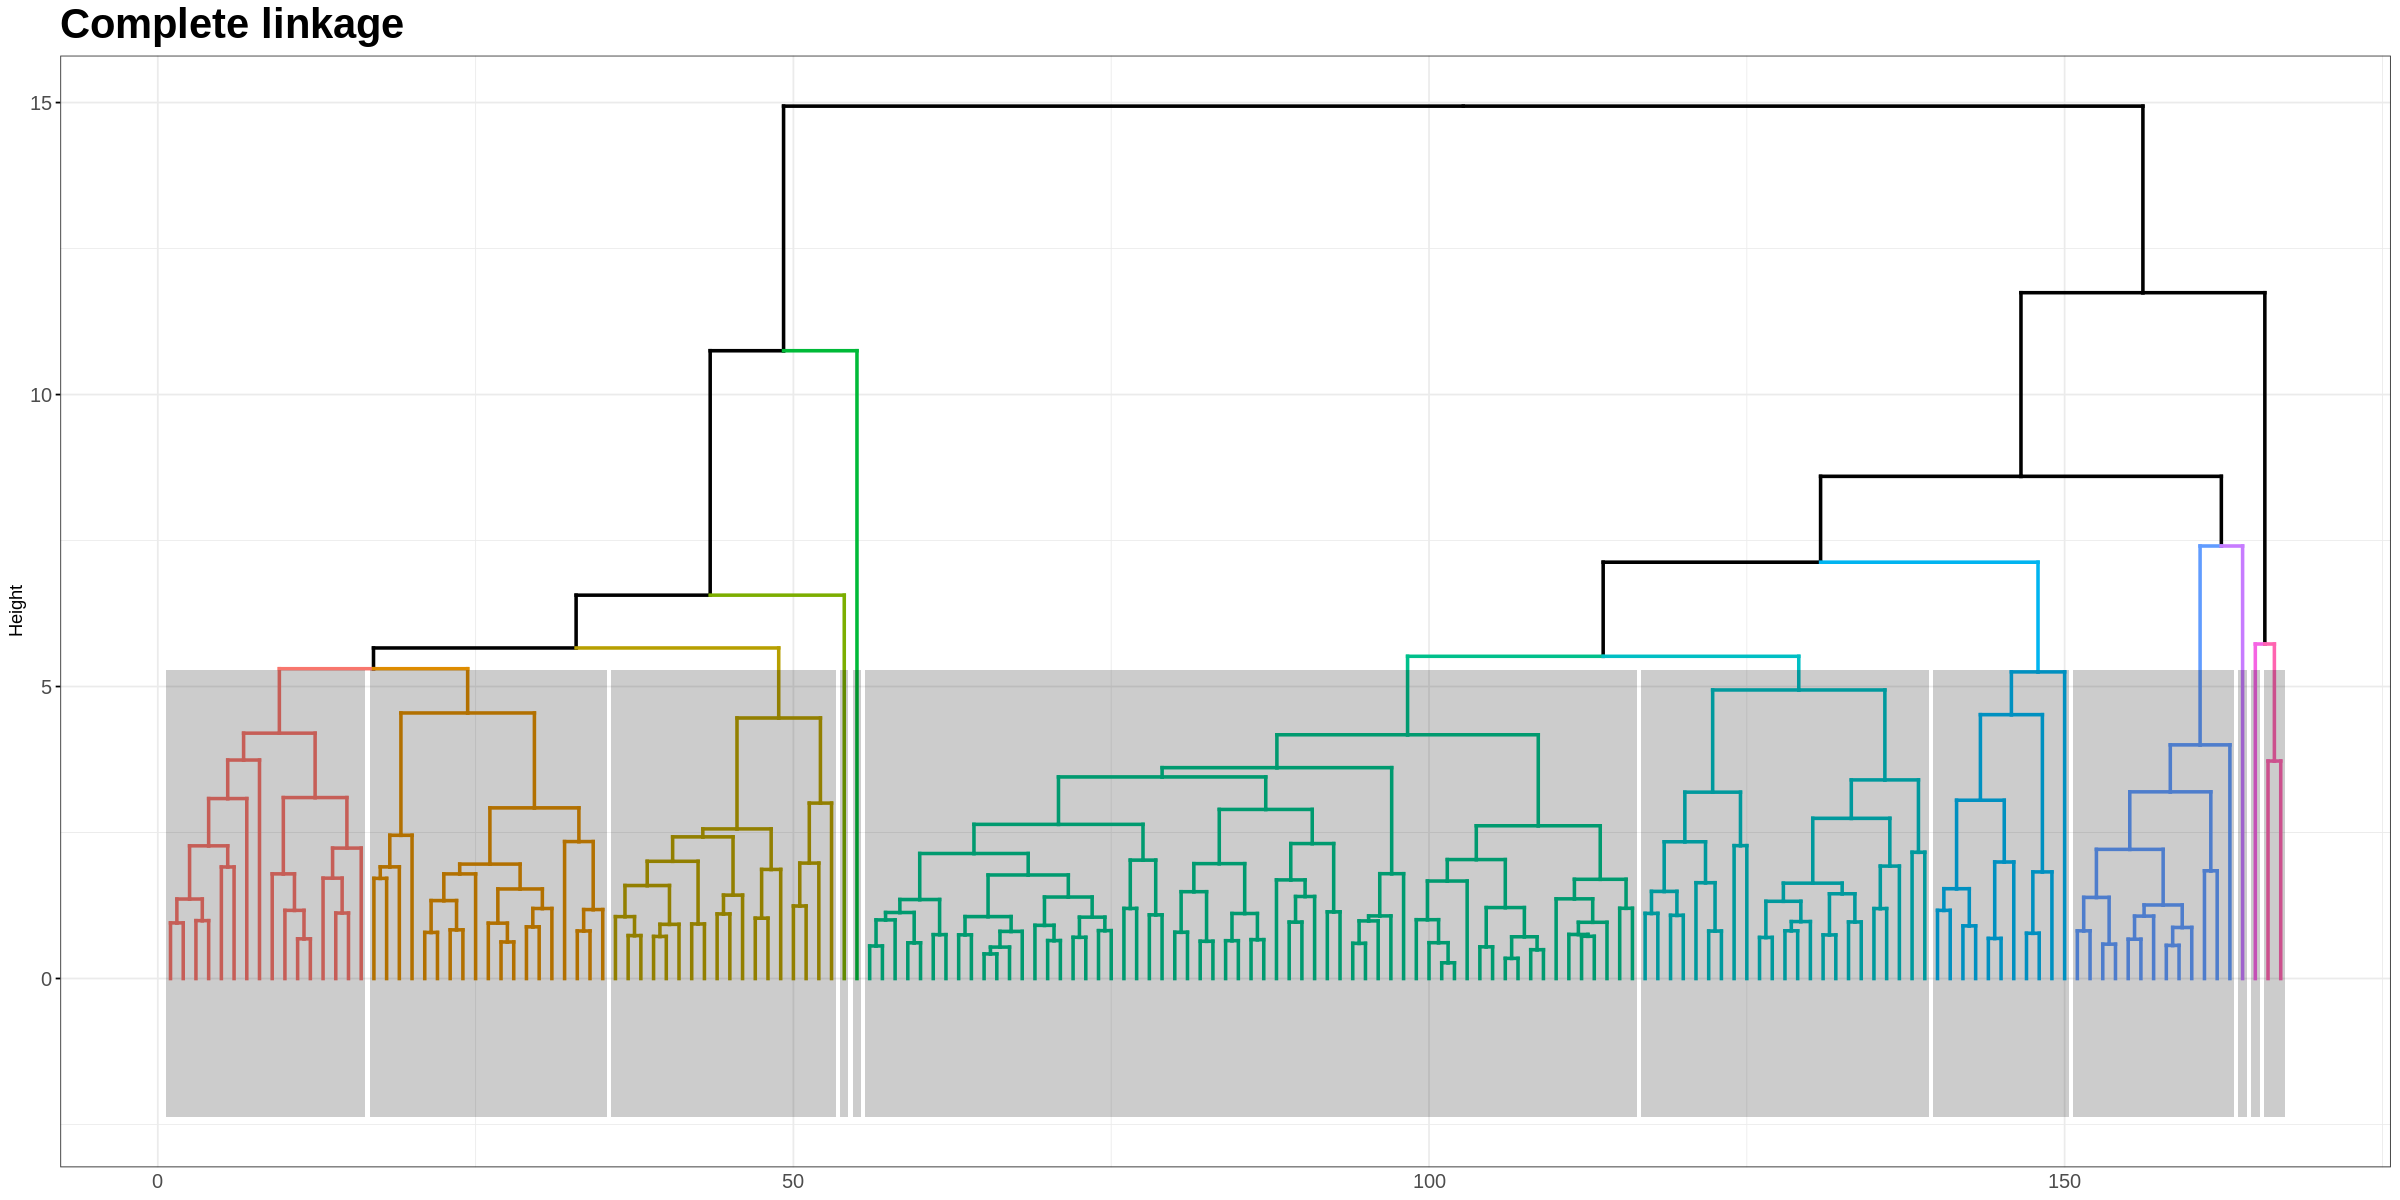

In [53]:
fviz_dend(x = cluster_hier_complete,
          h = 5.5,
          color_labels_by_k = F,
          rect = T,
          rect_fill = T,
          rect_border = "black",
          lwd = 1,
          show_labels = F,
          ggtheme = theme_bw()) +
          ggtitle("Complete linkage") +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Formam 12 clusters cortando o dendrograma em 5.50

 Vamos detalhar esse esquema hierárquico



In [55]:
coeficientes <- sort(cluster_hier_complete$height, decreasing = FALSE) 
esquema <- as.data.frame(cbind(cluster_hier_complete$merge, coeficientes))
names(esquema) <- c("Cluster1", "Cluster2", "Coeficientes")
head(esquema,n=5)

,Cluster1,Cluster2,Coeficientes
,<dbl>,<dbl>,<dbl>
1,-42,-122,0.2696998
2,-76,-140,0.3449023
3,-25,-86,0.4218627
4,-112,-159,0.4928481
5,3,-101,0.5380817


 Portanto, vamos gerar uma variável indicando 12 clusters

In [58]:
paises$cluster_H <- factor(cutree(tree = cluster_hier_complete, k = 12))
pais_padronizado$cluster_H <- factor(cutree(tree = cluster_hier_complete, k = 12))
head(paises,n=10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_H
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
2,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
3,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,3
4,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,4
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
6,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,3
7,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
8,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,5
9,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,5


A seguir, vamos verificar se todas as variáveis ajudam na formação dos grupos

In [91]:
Anova_child_mort=as.data.frame(c(summary(anova_child_mort <- aov(formula = child_mort ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_child_mort)<-c('cluster_H_child_mort' ,'Residuals_child_mort')# Mundando o nome das colunas

Anova_exports=as.data.frame(c(summary(anova_exports <- aov(formula = exports ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_exports)<-c('cluster_H_exports' ,'Residuals_exports')# Mundando o nome das colunas

Anova_health=as.data.frame(c(summary(anova_health <- aov(formula = health ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_health)<-c('cluster_H_health' ,'Residuals_health')# Mundando o nome das colunas

Anova_imports=as.data.frame(c(summary(anova_imports <- aov(formula = imports ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_imports)<-c('cluster_H_imports' ,'Residuals_imports')# Mundando o nome das colunas

Anova_income=as.data.frame(c(summary(anova_income <- aov(formula = income ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_income)<-c('cluster_H_income' ,'Residuals_income')# Mundando o nome das colunas

Anova_life_expec=as.data.frame(c(summary(anova_life_expec <- aov(formula = life_expec ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_life_expec)<-c('cluster_H_life_expec' ,'Residuals_life_expec')# Mundando o nome das colunas

Anova_totalfer=as.data.frame(c(summary(anova_totalfer <- aov(formula = total_fer ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_totalfer)<-c('cluster_H_totalfer' ,'Residuals_totalfer')# Mundando o nome das colunas

Anova_gdpp=as.data.frame(c(summary(anova_gdpp <- aov(formula = gdpp ~ cluster_H,
                                data = pais_padronizado)))) # Gerando uma análise de ANOVA e passando para um Dataframe
rownames(Anova_gdpp)<-c('cluster_H_gdpp' ,'Residuals_gdpp')# Mundando o nome das colunas

Anova = rbind(Anova_gdpp,Anova_totalfer,Anova_life_expec,Anova_income,Anova_imports,Anova_health,Anova_exports,Anova_child_mort) 
Anova

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cluster_H_gdpp,11,133.51944,12.1381313,57.92421,3.341069e-49
Residuals_gdpp,155,32.48056,0.2095520,NA,NA
cluster_H_totalfer,11,139.16949,12.6517719,73.08936,1.484369e-55
Residuals_totalfer,155,26.83051,0.1731001,NA,NA
cluster_H_life_expec,11,133.08578,12.0987072,56.97536,9.205328e-49
Residuals_life_expec,155,32.91422,0.2123498,NA,NA
cluster_H_income,11,135.28738,12.2988527,62.06967,4.628351e-51
Residuals_income,155,30.71262,0.1981459,NA,NA
cluster_H_imports,11,104.68123,9.5164757,24.05550,2.783893e-28


Todas auxiliam na formação de pelo menos um cluster

O que os cluster indicam? Vamos interpretar algumas variáveis médias:

In [90]:
analise <- group_by(paises, cluster_H) %>%
  summarise(income = mean(income, na.rm = TRUE),
            gdpp = mean(gdpp, na.rm = TRUE),
            mort = mean(child_mort, na.rm = TRUE),
            health = mean(health, na.rm = TRUE),
            expec = mean(life_expec, na.rm = TRUE))
analise

cluster_H,income,gdpp,mort,health,expec
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3113.312,1533.375,87.700000,8.145000,59.42500
2,16686.393,11510.492,13.055738,7.344590,75.74262
3,9561.739,4256.522,38.547826,4.381739,69.80870
4,3901.053,1872.474,100.168421,4.770000,59.93684
5,43930.769,52469.231,4.153846,10.944615,81.00000
6,47954.545,30400.000,10.009091,5.475455,77.23636
7,4393.889,2353.944,48.788889,7.321667,63.79444
8,1500.000,662.000,208.000000,6.910000,32.10000
9,91700.000,105000.000,2.800000,7.770000,81.30000




*   Por exemplo: os países do cluster 1 e 4 apresentam: 
*   Baixa renda média, baixo PIB per capita, 
*   Elevada mortalidade infantil, baixa expectativa de vida
*   Portanto, são os países em que deve haver ajuda para melhoria das condições


